In [53]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [54]:
# Create a set of random latitude and longitude combinations lesson 6.1.4
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [55]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [56]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

30.760053210532618 -171.15104861820745
37.30017891379268 20.60997448934097
-11.572761692594383 128.56687927479118
76.30423613080035 -16.00958428387122
57.80281702020608 -129.96993140429925
77.98043578389422 48.648995813420356
26.66171812324214 162.7924821656486
-84.14295739427055 -26.236254843114693
33.193420982412576 17.746150799058398
29.998204895156277 -64.48048671210334
-88.60235030606391 32.29136744265011
20.57647899668744 -70.62233705222916
-78.35637249132827 105.77727668464615
81.64251224822115 72.72954281398685
-26.999625486138903 -81.84467808048294
-85.19049159450307 179.3522068055711
-16.831746619972023 -87.77693218490796
-4.664571057266926 -42.46559780903806
20.69388496321035 -103.5175133282578
19.88157198584497 -113.04768783026908
83.7534191462264 37.1431000085187
-54.991202655335236 11.237748059877788
11.576750059437003 167.8107692613376
4.110347181391518 51.755377166309756
-39.36908849295578 1.6953700872822992
-65.75961935021331 71.82054616426703
-59.86950614127612 -35.59

-62.844478719762044 -21.328139513205713
-78.28913145783378 -119.85563487827973
83.12194568633677 -161.92630355097262
-72.11009515315928 -159.34096293359212
27.49767319621519 -118.03068144699736
-72.45300713976016 5.930069949900798
-80.69865423418511 -127.77803927962968
62.487484185600806 142.13704986295318
55.11178547111106 171.50029454813932
59.43271009999876 -156.04048540595633
1.2507858941151255 135.3688407663941
-46.45654915120056 -136.83398761781731
75.06602113050701 50.769799556528284
50.560018439468024 123.82585528309318
-41.793018425726316 -3.403766857240811
-32.617573134609266 112.53344544261631
-20.91627042037362 -89.23872281317084
70.7554668865933 -165.79888983724422
36.126321158795434 132.26089731934115
-40.14769880053342 -43.6349108765273
-22.537268841052736 1.106646185392691
-70.88571480580728 82.2010929412682
-18.794913239218474 -178.43588364477048
-72.82250501651906 -84.4011516805492
72.69657661089474 -151.2732678793907
-84.2181988925519 -156.84643680663626
-1.996531191

In [57]:
from citipy import citipy

In [58]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)
    

606

In [59]:
# Starting URL for Weather Map API Call (Base URL)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [21]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1


# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse our the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experiences, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | noumea
Processing Record 2 of Set 1 | taos
Processing Record 3 of Set 1 | paamiut
Processing Record 4 of Set 1 | houma
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | abeche
Processing Record 7 of Set 1 | shimoda
Processing Record 8 of Set 1 | constitucion
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | shiraz
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | kondinskoye
Processing Record 17 of Set 1 | honavar
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | narsaq
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set

Processing Record 37 of Set 4 | mizpe ramon
City not found. Skipping...
Processing Record 38 of Set 4 | tadian
Processing Record 39 of Set 4 | krasnoselkup
Processing Record 40 of Set 4 | cap malheureux
Processing Record 41 of Set 4 | berlevag
Processing Record 42 of Set 4 | teguldet
Processing Record 43 of Set 4 | lasa
Processing Record 44 of Set 4 | dunmore town
Processing Record 45 of Set 4 | at-bashi
Processing Record 46 of Set 4 | vysokyy
Processing Record 47 of Set 4 | la paz
Processing Record 48 of Set 4 | marion
Processing Record 49 of Set 4 | tokur
Processing Record 50 of Set 4 | vardo
Processing Record 1 of Set 5 | bengkulu
Processing Record 2 of Set 5 | necochea
Processing Record 3 of Set 5 | adrar
Processing Record 4 of Set 5 | le mans
Processing Record 5 of Set 5 | leningradskiy
Processing Record 6 of Set 5 | predivinsk
Processing Record 7 of Set 5 | hervey bay
Processing Record 8 of Set 5 | bambous virieux
Processing Record 9 of Set 5 | tessalit
Processing Record 10 of Se

Processing Record 26 of Set 8 | saint-louis
Processing Record 27 of Set 8 | zyryanka
Processing Record 28 of Set 8 | cockburn town
Processing Record 29 of Set 8 | touros
Processing Record 30 of Set 8 | poplar bluff
Processing Record 31 of Set 8 | hailey
Processing Record 32 of Set 8 | axim
Processing Record 33 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 34 of Set 8 | nanakuli
Processing Record 35 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 36 of Set 8 | raudeberg
Processing Record 37 of Set 8 | amapa
Processing Record 38 of Set 8 | narok
Processing Record 39 of Set 8 | arlit
Processing Record 40 of Set 8 | atherton
Processing Record 41 of Set 8 | souillac
Processing Record 42 of Set 8 | kawana waters
City not found. Skipping...
Processing Record 43 of Set 8 | octeville
Processing Record 44 of Set 8 | sao miguel do araguaia
Processing Record 45 of Set 8 | ingham
Processing Record 46 of Set 8 | abapo
Processing Record 47 of Set 8 | ashla

Processing Record 10 of Set 12 | hasaki
Processing Record 11 of Set 12 | naco
Processing Record 12 of Set 12 | tual
Processing Record 13 of Set 12 | waingapu
Processing Record 14 of Set 12 | nikel
Processing Record 15 of Set 12 | pishva
Processing Record 16 of Set 12 | caala
Processing Record 17 of Set 12 | qurayyat
Processing Record 18 of Set 12 | heze
Processing Record 19 of Set 12 | bocaranga
City not found. Skipping...
Processing Record 20 of Set 12 | havre-saint-pierre
Processing Record 21 of Set 12 | thilogne
City not found. Skipping...
Processing Record 22 of Set 12 | harbour breton
Processing Record 23 of Set 12 | temaraia
City not found. Skipping...
Processing Record 24 of Set 12 | inongo
Processing Record 25 of Set 12 | ipora
Processing Record 26 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 27 of Set 12 | saryozek
Processing Record 28 of Set 12 | road town
Processing Record 29 of Set 12 | sidi ali
Processing Record 30 of Set 12 | sambava
Processing Record

In [60]:
len(city_data)

534

In [61]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,noumea,-22.2763,166.4572,84.18,71,9,7.05,NC,22-10-29 00:02:12
1,taos,36.4072,-105.5731,54.00,26,0,0.00,US,22-10-29 00:04:02
2,paamiut,61.9940,-49.6678,33.93,85,100,23.13,GL,22-10-29 00:02:59
3,houma,29.5958,-90.7195,68.00,93,0,11.50,US,22-10-28 23:59:48
4,ponta do sol,32.6667,-17.1000,72.01,82,16,5.53,PT,22-10-29 00:04:02
5,abeche,13.8292,20.8324,78.31,18,87,8.34,TD,22-10-29 00:09:13
6,shimoda,34.6667,138.9500,65.10,61,6,7.20,JP,22-10-29 00:09:13
7,constitucion,-35.3333,-72.4167,54.79,93,96,3.47,CL,22-10-29 00:10:10
8,torbay,47.6666,-52.7314,45.75,60,3,7.00,CA,22-10-29 00:11:51
9,shiraz,29.6036,52.5388,51.24,54,0,0.00,IR,22-10-29 00:09:14


In [62]:
# Reorder columns
city_data_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,noumea,NC,22-10-29 00:02:12,-22.2763,166.4572,84.18,71,9,7.05
1,taos,US,22-10-29 00:04:02,36.4072,-105.5731,54.00,26,0,0.00
2,paamiut,GL,22-10-29 00:02:59,61.9940,-49.6678,33.93,85,100,23.13
3,houma,US,22-10-28 23:59:48,29.5958,-90.7195,68.00,93,0,11.50
4,ponta do sol,PT,22-10-29 00:04:02,32.6667,-17.1000,72.01,82,16,5.53
5,abeche,TD,22-10-29 00:09:13,13.8292,20.8324,78.31,18,87,8.34
6,shimoda,JP,22-10-29 00:09:13,34.6667,138.9500,65.10,61,6,7.20
7,constitucion,CL,22-10-29 00:10:10,-35.3333,-72.4167,54.79,93,96,3.47
8,torbay,CA,22-10-29 00:11:51,47.6666,-52.7314,45.75,60,3,7.00
9,shiraz,IR,22-10-29 00:09:14,29.6036,52.5388,51.24,54,0,0.00


In [63]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [64]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

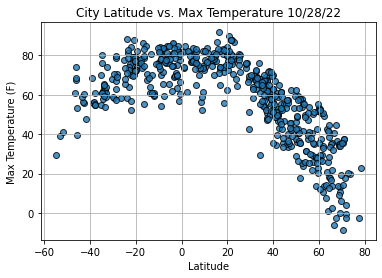

In [65]:
# Import time module

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

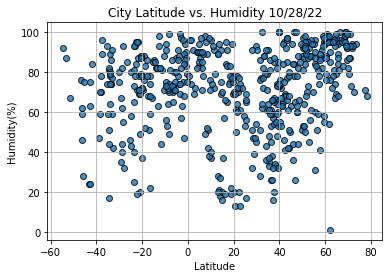

In [66]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

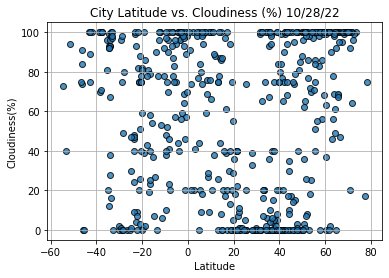

In [67]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

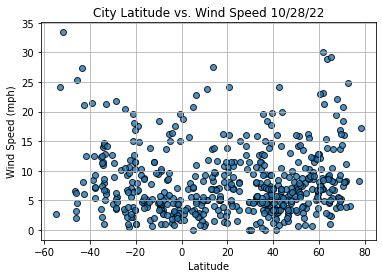

In [68]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [74]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [77]:
index13 = city_data_df.loc[13]
index13

City               punta arenas
Country                      CL
Date          22-10-29 00:07:42
Lat                      -53.15
Lng                    -70.9167
Max Temp                  39.31
Humidity                     87
Cloudiness                   40
Wind Speed                24.16
Name: 13, dtype: object

In [78]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
529     True
530     True
531    False
532     True
533     True
Name: Lat, Length: 534, dtype: bool

In [80]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,taos,US,22-10-29 00:04:02,36.4072,-105.5731,54.00,26,0,0.00
2,paamiut,GL,22-10-29 00:02:59,61.9940,-49.6678,33.93,85,100,23.13
3,houma,US,22-10-28 23:59:48,29.5958,-90.7195,68.00,93,0,11.50
4,ponta do sol,PT,22-10-29 00:04:02,32.6667,-17.1000,72.01,82,16,5.53
5,abeche,TD,22-10-29 00:09:13,13.8292,20.8324,78.31,18,87,8.34


In [82]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

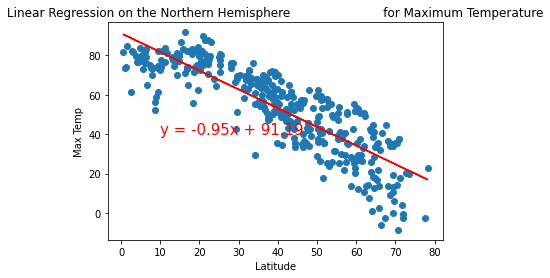

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))

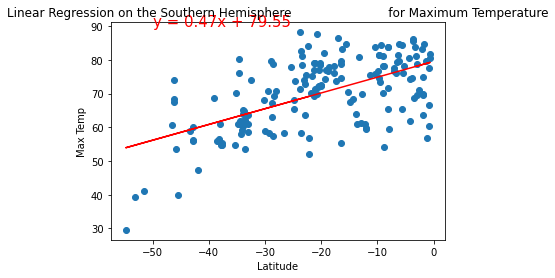

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

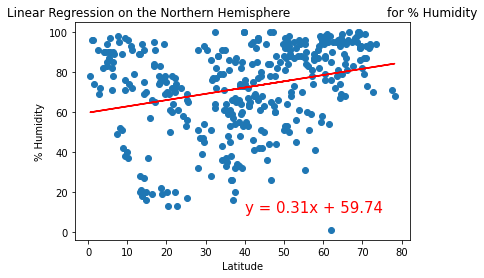

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

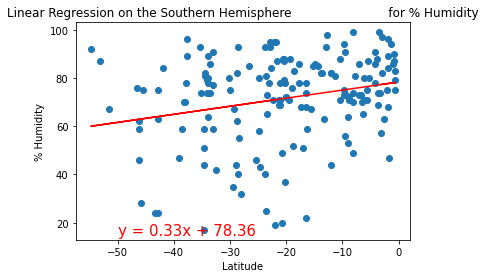

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

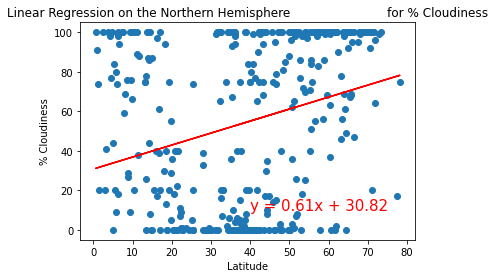

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

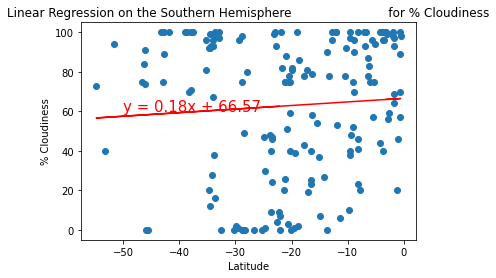

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

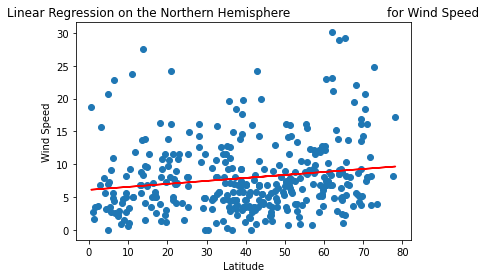

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

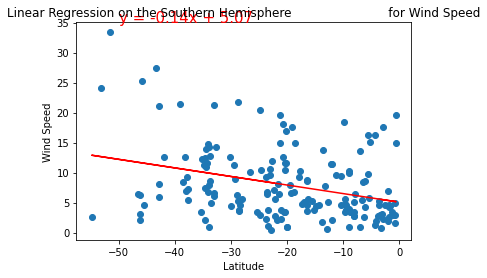

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))